<a href="https://colab.research.google.com/github/Devansharma/Deep_Learning/blob/master/CNN_Architectures_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
transform_train = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))
])

transform_test = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.ToTensor(),
                transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5))
])

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True,
                                        transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
num_classes = 10
batch_size = 4

In [6]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                           shuffle=True)

In [7]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
1


In [8]:
def imshow(img, title):
  npimg = img.numpy()/2+0.5
  plt.figure(figsize=(batch_size, 1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.title(title)
  plt.show()

In [9]:
def show_batch_images(dataloader):
  images, labels = next(iter(dataloader))
  img = torchvision.utils.make_grid(images)
  imshow(img, title=[str(x.item()) for x in labels])

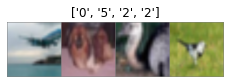

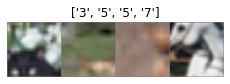

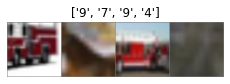

In [10]:
for i in range(3):
  show_batch_images(train_loader)

In [11]:
from torchvision import models

In [12]:
vgg = models.vgg16_bn()

In [13]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [14]:
final_in_features = vgg.classifier[6].in_features
mod_classifier = list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features, num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [15]:
vgg.classifier = nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [16]:
batch_size = 16

trainloader=torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader=torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [17]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [18]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

Iteration: 0/3125, Loss: 2.20
Iteration: 100/3125, Loss: 2.25
Iteration: 200/3125, Loss: 2.33
Iteration: 300/3125, Loss: 2.32
Iteration: 400/3125, Loss: 2.17
Iteration: 500/3125, Loss: 2.35
Iteration: 600/3125, Loss: 2.28
Iteration: 700/3125, Loss: 2.25
Iteration: 800/3125, Loss: 2.24
Iteration: 900/3125, Loss: 2.23
Iteration: 1000/3125, Loss: 2.32
Iteration: 1100/3125, Loss: 2.16
Iteration: 1200/3125, Loss: 2.21
Iteration: 1300/3125, Loss: 2.37
Iteration: 1400/3125, Loss: 2.20
Iteration: 1500/3125, Loss: 2.09
Iteration: 1600/3125, Loss: 2.10
Iteration: 1700/3125, Loss: 2.19
Iteration: 1800/3125, Loss: 2.70
Iteration: 1900/3125, Loss: 2.12
Iteration: 2000/3125, Loss: 2.07
Iteration: 2100/3125, Loss: 2.00
Iteration: 2200/3125, Loss: 2.06
Iteration: 2300/3125, Loss: 2.03
Iteration: 2400/3125, Loss: 2.22
Iteration: 2500/3125, Loss: 2.23
Iteration: 2600/3125, Loss: 2.18
Iteration: 2700/3125, Loss: 1.93
Iteration: 2800/3125, Loss: 2.03
Iteration: 2900/3125, Loss: 2.20
Iteration: 3000/3125, 

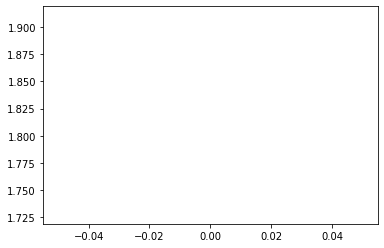

In [20]:
loss_epoch_arr = []
max_epochs = 1

n_iters = np.ceil(50000/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = vgg(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
        epoch, max_epochs, 
        evaluation(testloader, vgg), evaluation(trainloader, vgg)))
    
plt.plot(loss_epoch_arr)
plt.show()

Freezing Convolutional Layers

In [21]:
batch_size = 16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [22]:
vgg = models.vgg16_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


In [23]:
for param in vgg.parameters():
  param.requires_grad = False

In [24]:
final_in_features = vgg.classifier[6].in_features
vgg.classifier[6] = nn.Linear(final_in_features, num_classes)

In [25]:
for param in vgg.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [26]:
vgg = vgg.to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(vgg.parameters(), lr=0.05)

Iteration: 0/3125, Loss: 2.42
Iteration: 100/3125, Loss: 1.86
Iteration: 200/3125, Loss: 2.27
Iteration: 300/3125, Loss: 1.92
Iteration: 400/3125, Loss: 2.48
Iteration: 500/3125, Loss: 1.02
Iteration: 600/3125, Loss: 1.02
Iteration: 700/3125, Loss: 3.66
Iteration: 800/3125, Loss: 2.79
Iteration: 900/3125, Loss: 2.99
Iteration: 1000/3125, Loss: 1.98
Iteration: 1100/3125, Loss: 1.22
Iteration: 1200/3125, Loss: 0.74
Iteration: 1300/3125, Loss: 2.65
Iteration: 1400/3125, Loss: 2.84
Iteration: 1500/3125, Loss: 1.72
Iteration: 1600/3125, Loss: 2.42
Iteration: 1700/3125, Loss: 1.94
Iteration: 1800/3125, Loss: 2.46
Iteration: 1900/3125, Loss: 2.32
Iteration: 2000/3125, Loss: 2.19
Iteration: 2100/3125, Loss: 1.63
Iteration: 2200/3125, Loss: 1.51
Iteration: 2300/3125, Loss: 1.34
Iteration: 2400/3125, Loss: 1.45
Iteration: 2500/3125, Loss: 1.44
Iteration: 2600/3125, Loss: 2.07
Iteration: 2700/3125, Loss: 3.19
Iteration: 2800/3125, Loss: 1.78
Iteration: 2900/3125, Loss: 3.20
Iteration: 3000/3125, 

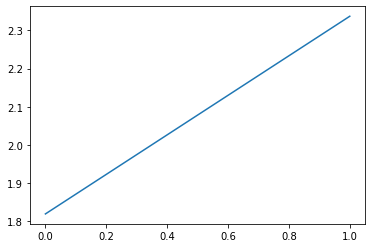

In [28]:
loss_epoch_ar = []
max_epochs = 1
n_iters = np.ceil(50000/batch_size)
for epoch in range(max_epochs):
  for i,data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = vgg(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    if i%100 == 0:
      print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))

    del inputs, labels, outputs
    torch.cuda.empty_cache()

  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (
      epoch, max_epochs,
      evaluation(testloader, vgg), evaluation(trainloader, vgg)))
  
  plt.plot(loss_epoch_arr)
  plt.show()